Optimizing the CNN model with Keras Tuner

In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 37.9 MB/s 


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset from keras.dataset 
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# checking the shape of the Training dataset
train_shape=len(X_train)
print("The Shape of the Training dataset :",train_shape)

The Shape of the Training dataset : 60000


In [4]:
# checking the shape of the Testing dataset
test_shape=len(X_test)
print("The Shape of the Testing dataset :",test_shape)

The Shape of the Testing dataset : 10000


In [5]:
# Checking the pixel of the image
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

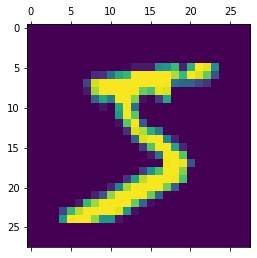

In [7]:
# plotting the image using matplotlib 
plt.matshow(X_train[0])

In [9]:
# lets check the ytrain
y_train[0]

5

In [8]:
#scale down the pixel from 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0] # now its ranging from o to 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Building Deep Learning Model

In [11]:
# IMPORTING REQUIRED LIBRARIES
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [15]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D( # first convolution layers
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), # no of filters from 32 to 128 , int means choosing b/t 32 to 128
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), # size of the filter or kernel, choice means choose either 3 or 5.
        activation='relu',
        input_shape=(28,28,1) 
    ),
    keras.layers.Conv2D( # second convolution layers
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(), # fully connected layer
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax') # softmax for multi class classification
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [16]:
from keras_tuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [17]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=1)

In [18]:
tuner_search.search(X_train, y_train ,epochs=3,validation_split=0.1)

Trial 1 Complete [00h 11m 23s]
val_accuracy: 0.9776666760444641

Best val_accuracy So Far: 0.9776666760444641
Total elapsed time: 00h 11m 23s


In [20]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 48)        27696     
                                                                 
 flatten (Flatten)           (None, 23232)             0         
                                                                 
 dense (Dense)               (None, 80)                1858640   
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                                 
Total params: 1,888,810
Trainable params: 1,888,810
Non-trainable params: 0
_________________________________________________________________


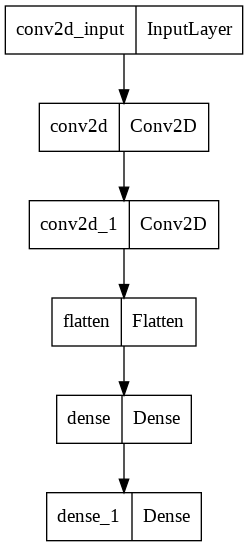

In [34]:
tf.keras.utils.plot_model(model)

In [21]:
model.fit(X_train,y_train, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 214s 126ms/step - loss: 0.1016 - accuracy: 0.9696 - val_loss: 0.0964 - val_accuracy: 0.9723
Epoch 5/10
1688/1688 [==============================] - 207s 123ms/step - loss: 0.0917 - accuracy: 0.9730 - val_loss: 0.0922 - val_accuracy: 0.9730
Epoch 6/10
1688/1688 [==============================] - 207s 123ms/step - loss: 0.0772 - accuracy: 0.9777 - val_loss: 0.0906 - val_accuracy: 0.9732
Epoch 7/10
1688/1688 [==============================] - 206s 122ms/step - loss: 0.0754 - accuracy: 0.9787 - val_loss: 0.1012 - val_accuracy: 0.9787
Epoch 8/10
1688/1688 [==============================] - 208s 123ms/step - loss: 0.0678 - accuracy: 0.9804 - val_loss: 0.1138 - val_accuracy: 0.9725
Epoch 9/10
1688/1688 [==============================] - 206s 122ms/step - loss: 0.0704 - accuracy: 0.9798 - val_loss: 0.1186 - val_accuracy: 0.9722
Epoch 10/10
1688/1688 [==============================] - 232s 137ms/step - loss: 0.0630 - accuracy: 0.9829 - val

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 28ms/step - loss: 0.1258 - accuracy: 0.9766


[0.1257750540971756, 0.9765999913215637]

Text(69.0, 0.5, 'Truth')

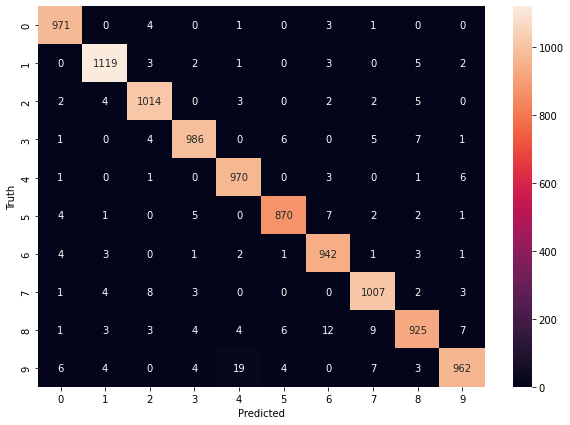

In [24]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

true: 0, predict: 0


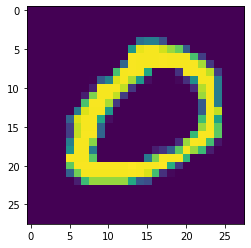

In [31]:
randint = np.random.randint(0, X_test.shape[0])
plt.imshow(X_test[randint, :])
print(f"true: {np.argmax(y_test[randint])}, predict: {np.argmax(y_pred[randint])}")